In [17]:
from nltk.corpus import twitter_samples
from nltk.tag import pos_tag_sents

In [18]:
twitter_samples.fileids()

['negative_tweets.json', 'positive_tweets.json', 'tweets.20150430-223406.json']

In [ ]:
t_all=twitter_samples.strings("negative_tweets.json")
tweets_tokens=twitter_samples.tokenized("negative_tweets.json")
pos_tag_sents(tweets_tokens)

In [3]:
import pandas as pd
df=pd.read_csv("C:/Users/Genesis/Pictures/digintetn/datasets/Online Retail.csv")
#need to convert thids to datetime format so that it can be compared,I had done study on the sleeping 
#patern of people using date,it needs to be convereted otherwise we wont be able to compare the date 

df.InvoiceDate = pd.to_datetime(df.InvoiceDate, format="%m/%d/%Y %H:%M")


In [13]:
from nltk.corpus import stopwords
s=set(stopwords.words('english'))
txt="a long string of text about him and her"
print( filter(lambda w: not w in s,txt.split()))
filtered_words = list(filter(lambda word: word not in s, txt.split()))
filtered_words

['long', 'string', 'text']

# Also we can remove the words that we need to remove by adding to the stop words

In [15]:
s.add("long")
filtered_words = list(filter(lambda word: word not in s, txt.split()))
filtered_words

['string', 'text']

# separting words and integers if needed

In [25]:
def filter_by_type(all_words_int, type_of):
    
    return [n for n in all_words_int if isinstance(n, type_of)]


In [26]:
import itertools
ba=[]
int_no=[]
string_all=[]
print(len(df),len(df["Description"].unique()))

df=df.dropna(subset =["Description"])
print(len(df))

for i in df["Description"].unique():
    
    f = list(filter(lambda word: word not in stopwords.words('english'), i.split()))
    
    ba.append(f)
    for i in ba:
        

540455 4223
540455


# separate the int and string 

In [39]:
ac=['SET', '7', 'BABUSHKA', 'NESTING', 'BOXES']
int_n
for i in ac:
    print(i.isdigit())
    if i.isdigit()==True:
        ac.remove(i)
        int
    
ac

False
True
False
False


['SET', 'BABUSHKA', 'NESTING', 'BOXES']

In [48]:
from bs4 import BeautifulSoup 
bag_word="are bad m'kay. <br/><br/>..."
example1 = BeautifulSoup(bag_word)
print(example1.text)

are bad m'kay. ...


c:\users\genesis\miniconda3\lib\site-packages\bs4\__init__.py:181: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 193 of the file c:\users\genesis\miniconda3\lib\runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup(YOUR_MARKUP})

to this:

 BeautifulSoup(YOUR_MARKUP, "lxml")

  markup_type=markup_type))


In [52]:
import re
letters_only = re.sub("[^a-zA-Z]",           # The pattern to search for
                      "",                   # The pattern to replace it with
                      example1.get_text() )
#.replace(",", "") can also use this

In [53]:
letters_only

'arebadmkay'

In [54]:
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

<module 'logging' from 'c:\\users\\genesis\\miniconda3\\lib\\logging\\__init__.py'>

In [51]:
from gensim import corpora

documents = ["Human machine interface for lab abc computer applications",              "A survey of user opinion of computer system response time",
"The EPS user interface management system",
"System and human system engineering testing of EPS",
"Relation of user perceived response time to error measurement",
"The generation of random binary unordered trees",
"The intersection graph of paths in trees",
"Graph minors IV Widths of trees and well quasi ordering",
"Graph minors A survey"]

c:\users\genesis\miniconda3\lib\site-packages\gensim\utils.py:860: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


In [81]:
stoplist = set('for a of the and to in'.split())
texts = [[word for word in document.lower().split() if word not in stoplist]for document in documents]
from pprint import pprint
pprint(texts)

[['human', 'machine', 'interface', 'lab', 'abc', 'computer', 'applications'],
 ['survey', 'user', 'opinion', 'computer', 'system', 'response', 'time'],
 ['eps', 'user', 'interface', 'management', 'system'],
 ['system', 'human', 'system', 'engineering', 'testing', 'eps'],
 ['relation', 'user', 'perceived', 'response', 'time', 'error', 'measurement'],
 ['generation', 'random', 'binary', 'unordered', 'trees'],
 ['intersection', 'graph', 'paths', 'trees'],
 ['graph', 'minors', 'iv', 'widths', 'trees', 'well', 'quasi', 'ordering'],
 ['graph', 'minors', 'survey']]


In [79]:
#removing words of frequency ,can be used to remove words of not use
from collections import defaultdict
frequency = defaultdict(int)
print(frequency)
for text in texts:
    for token in text:
        frequency[token] += 1

texts = [[token for token in text if frequency[token] > 1]
        for text in texts]        
texts

defaultdict(<class 'int'>, {})


[['human', 'interface', 'computer'],
 ['survey', 'user', 'computer', 'system', 'response', 'time'],
 ['eps', 'user', 'interface', 'system'],
 ['system', 'human', 'system', 'eps'],
 ['user', 'response', 'time'],
 ['trees'],
 ['graph', 'trees'],
 ['graph', 'minors', 'trees'],
 ['graph', 'minors', 'survey']]

In [92]:

dictionary = corpora.Dictionary(texts)
pprint((dictionary.token2id))
#for i in dictionary:
 #   print(i)
    

2017-11-22 18:41:01,200 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2017-11-22 18:41:01,203 : INFO : built Dictionary(35 unique tokens: ['human', 'machine', 'interface', 'lab', 'abc']...) from 9 documents (total 52 corpus positions)


{'abc': 4,
 'applications': 6,
 'binary': 23,
 'computer': 5,
 'engineering': 15,
 'eps': 13,
 'error': 19,
 'generation': 21,
 'graph': 27,
 'human': 0,
 'interface': 2,
 'intersection': 26,
 'iv': 30,
 'lab': 3,
 'machine': 1,
 'management': 14,
 'measurement': 20,
 'minors': 29,
 'opinion': 9,
 'ordering': 34,
 'paths': 28,
 'perceived': 18,
 'quasi': 33,
 'random': 22,
 'relation': 17,
 'response': 11,
 'survey': 7,
 'system': 10,
 'testing': 16,
 'time': 12,
 'trees': 25,
 'unordered': 24,
 'user': 8,
 'well': 32,
 'widths': 31}


# this is bacically provides you with the occurances and count ,which also can be done usually by using collections packag in a differnent way

In [96]:
new_doc = "Human computer interaction computer"
new_vec = dictionary.doc2bow(new_doc.lower().split())
new_vec


[(0, 1), (5, 2)]

In [100]:
corpus = [dictionary.doc2bow(text) for text in texts]
pprint(corpus)
# can be used to store corpora.MmCorpus.serialize('/tmp/deerwester.mm', corpus)

[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1)],
 [(5, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1)],
 [(2, 1), (8, 1), (10, 1), (13, 1), (14, 1)],
 [(0, 1), (10, 2), (13, 1), (15, 1), (16, 1)],
 [(8, 1), (11, 1), (12, 1), (17, 1), (18, 1), (19, 1), (20, 1)],
 [(21, 1), (22, 1), (23, 1), (24, 1), (25, 1)],
 [(25, 1), (26, 1), (27, 1), (28, 1)],
 [(25, 1), (27, 1), (29, 1), (30, 1), (31, 1), (32, 1), (33, 1), (34, 1)],
 [(7, 1), (27, 1), (29, 1)]]


# Bag Of Words Competion Anlysis

In [29]:
import pandas as pd
import re
from bs4 import BeautifulSoup 
train=pd.read_csv('C:/Users/Genesis/Pictures/digintetn/textAnalysisData/BagOfwords/labeledTrainData.tsv',delimiter='\t')
y_train=train['sentiment']
test=pd.read_csv('C:/Users/Genesis/Pictures/digintetn/textAnalysisData/BagOfwords/testData.tsv',delimiter='\t')
traindata = []
for i in range(0,len(train['review'])):
    traindata.append(" ".join(review_to_wordlist(train['review'][i])))
testdata = []
for i in range(0,len(test['review'])):
    testdata.append(" ".join(review_to_wordlist(test['review'][i])))

c:\users\genesis\miniconda3\lib\site-packages\bs4\__init__.py:181: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 193 of the file c:\users\genesis\miniconda3\lib\runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup(YOUR_MARKUP})

to this:

 BeautifulSoup(YOUR_MARKUP, "lxml")

  markup_type=markup_type))


In [28]:
def review_to_wordlist(review):
   
    review_text = BeautifulSoup(review).get_text()
    
    review_text = re.sub("[^a-zA-Z]"," ", review_text)
    
    # Convert words to lower case and split them into separate words.
    words = review_text.lower().split()
   
    # Return a list of words
    return(words)



In [31]:
from sklearn.feature_extraction.text import TfidfVectorizer as TFIV

In [32]:
tfv = TFIV(min_df=3,  max_features=None, 
        strip_accents='unicode', analyzer='word',token_pattern=r'\w{1,}',
        ngram_range=(1, 2), use_idf=1,smooth_idf=1,sublinear_tf=1,
        stop_words = 'english')

X_all = traindata + testdata # Combine both to fit the TFIDF vectorization.
lentrain = len(traindata)

tfv.fit(X_all) # This is the slow part!
X_all = tfv.transform(X_all)

X = X_all[:lentrain] # Separate back into training and test sets. 
X_test = X_all[lentrain:]



In [40]:
import tensorflow as tf
import numpy as np

corpus_raw = 'He is the king . The king is royal . She is the royal  queen '

# convert to lower case
corpus_raw = corpus_raw.lower()


In [48]:
words = []
for word in corpus_raw.split():
    if word != '.': # because we don't want to treat . as a word
        words.append(word)

words = set(words)

word2int = {}
int2word = {}
vocab_size = len(words) # gives the total number of unique words

for i,word in enumerate(words):
    word2int[word] = i
    int2word[i] = word

    

# raw sentences is a list of sentences.
raw_sentences = corpus_raw.split('.')
sentences = []
for sentence in raw_sentences:
    sentences.append(sentence.split())    


[['he', 'is', 'the', 'king'],
 ['the', 'king', 'is', 'royal'],
 ['she', 'is', 'the', 'royal', 'queen']]

In [ ]:

WINDOW_SIZE = 2

data = []
for sentence in sentences:
    for word_index, word in enumerate(sentence):
        for nb_word in sentence[max(word_index - WINDOW_SIZE, 0) : min(word_index + WINDOW_SIZE, len(sentence)) + 1] : 
            if nb_word != word:
                data.append([word, nb_word])

# function to convert numbers to one hot vectors
def to_one_hot(data_point_index, vocab_size):
    temp = np.zeros(vocab_size)
    temp[data_point_index] = 1
    return temp

x_train = [] # input word
y_train = [] # output word



In [50]:
#World Cloud

In [ ]:
from os import path
from wordcloud import WordCloud




# Generate a word cloud image
wordcloud = WordCloud().generate(documents)

# Display the generated image:
# the matplotlib way:
import matplotlib.pyplot as plt
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

# lower max_font_size
wordcloud = WordCloud(max_font_size=40).generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

    

In [59]:
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer()
messages = ["Hey hey hey lets go get lunch today :)",
           "Did you go home?",
           "Hey!!! I need a favor"]
vect.fit(messages)
vect.get_feature_names()

['did',
 'favor',
 'get',
 'go',
 'hey',
 'home',
 'lets',
 'lunch',
 'need',
 'today',
 'you']

In [60]:
#Genesim

In [80]:
from gensim import corpora, models, similarities
corpus = [[(0, 1.0), (1, 1.0), (2, 1.0)],
           [(2, 1.0), (3, 1.0), (4, 1.0), (5, 1.0), (6, 1.0), (8, 1.0)],
           [(1, 1.0), (3, 1.0), (4, 1.0), (7, 1.0)],
    [(0, 1.0), (4, 1.0), (7, 1.0)],
          [(3, 1.0), (5, 1.0), (6, 1.0)],
          [(9, 1.0)],
        [(9, 1.0), (10, 1.0)],
           [(9, 1.0), (10, 1.0), (11, 1.0)],
      [(8, 1.0), (10, 1.0), (11, 1.0)]]

tfidf = models.TfidfModel(corpus)

In [85]:
vec = [(0, 1), (4, 1),(1, 0odel = Word2Vec(sentences))]
print(tfidf[vec])
index = similarities.SparseMatrixSimilarity(tfidf[corpus], num_features=12)
print(index)
sims = index[tfidf[vec]]
print(sims)
print(list(enumerate(sims)))

[(0, 0.8075244024440723), (4, 0.5898341626740045)]
[ 0.4662244   0.19139354  0.24600551  0.778005    0.          0.          0.
  0.          0.        ]
[(0, 0.4662244), (1, 0.19139354), (2, 0.24600551), (3, 0.778005), (4, 0.0), (5, 0.0), (6, 0.0), (7, 0.0), (8, 0.0)]


In [72]:
index = similarities.SparseMatrixSimilarity(tfidf[corpus], num_features=12)
index

In [89]:
import gensim, logging



sentences = [['first', 'sentence'], ['second', 'sentence']]
# train word2vec on the two sentences
model = gensim.models.Word2Vec(sentences, min_count=1)

In [ ]:
model.build_vocab(sentences)  # can be a non-repeatable, 1-pass generator
model.train(other_sentences)
model = gensim.models.Word2Vec(sentences, min_count=10)  # default value is 5

In [ ]:
def review_to_wordlist(review):
    '''
    Meant for converting each of the IMDB reviews into a list of words.
    '''
    # First remove the HTML.
    review_text = BeautifulSoup(review).get_text()
    
    # Use regular expressions to only include words.
    review_text = re.sub("[^a-zA-Z]"," ", review_text)
    
    # Convert words to lower case and split them into separate words.
    words = review_text.lower().split()
   
    # Return a list of words
    return(words)

In [ ]:
train = pd.read_csv('labeledTrainData.tsv', header=0,
                delimiter="\t", quoting=3)
test = pd.read_csv('testData.tsv', header=0, delimiter="\t",
               quoting=3 )

In [ ]:
tfv = TFIV(min_df=3,  max_features=None, 
        strip_accents='unicode', analyzer='word',token_pattern=r'\w{1,}',
        ngram_range=(1, 2), use_idf=1,smooth_idf=1,sublinear_tf=1,
        stop_words = 'english')

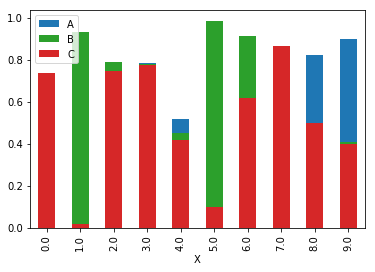

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

y = np.random.rand(10,4)
y[:,0]= np.arange(10)
df = pd.DataFrame(y, columns=["X", "A", "B", "C"])

ax = df.plot(x="X", y="A", kind="bar")
df.plot(x="X", y="B", kind="bar", ax=ax, color="C2")
df.plot(x="X", y="C", kind="bar", ax=ax, color="C3")

plt.show()


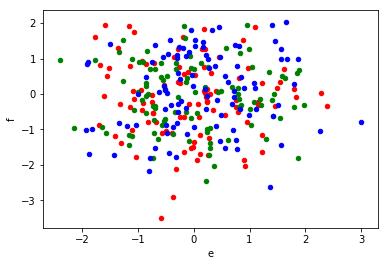

In [6]:
import pandas as pd
import numpy as np

df = pd.DataFrame(np.random.randn(100, 6), columns=['a', 'b', 'c', 'd', 'e', 'f'])


ax1 = df.plot(kind='scatter', x='a', y='b', color='r')    
ax2 = df.plot(kind='scatter', x='c', y='d', color='g', ax=ax1)    
ax3 = df.plot(kind='scatter', x='e', y='f', color='b', ax=ax1)
plt.show()

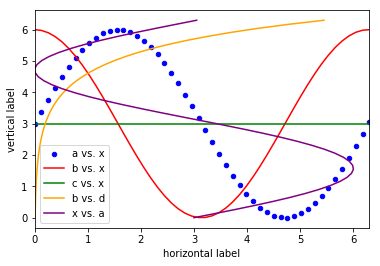

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(0,6.3, 50)
a = (np.sin(x)+1)*3
b = (np.cos(x)+1)*3
c = np.ones_like(x)*3
d = np.exp(x)/100.
df = pd.DataFrame({"x":x, "a":a, "b":b, "c":c, "d":d})

ax = df.plot(kind="scatter", x="x",y="a", color="b", label="a vs. x")
df.plot(x="x",y="b", color="r", label="b vs. x", ax=ax)
df.plot( x="x",y="c", color="g", label="c vs. x", ax=ax)
df.plot( x="d",y="x", color="orange", label="b vs. d", ax=ax)
df.plot( x="a",y="x", color="purple", label="x vs. a", ax=ax)

ax.set_xlabel("horizontal label")
ax.set_ylabel("vertical label")
plt.show()

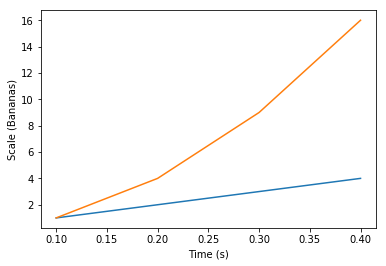

In [8]:
import matplotlib.pyplot as plt

x_data = [0.1, 0.2, 0.3, 0.4]
y_data = [1, 2, 3, 4]

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot([0.1, 0.2, 0.3, 0.4], [1, 2, 3, 4])
ax.plot([0.1, 0.2, 0.3, 0.4], [1, 4, 9, 16])
ax.set_xlabel('Time (s)')
ax.set_ylabel('Scale (Bananas)')

plt.show()

In [14]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from urllib.request import urlretrieve
import _pickle as pickle
import os
import gzip
import numpy as np

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [23]:
import theano
import lasagne
from lasagne import layers
from lasagne.updates import nesterov_momentum
from nolearn.lasagne import NeuralNet

from nolearn.lasagne import visualize


c:\users\genesis\miniconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [26]:
def load_dataset():
    url = 'http://deeplearning.net/data/mnist/mnist.pkl.gz'
    filename = 'mnist.pkl.gz'
    if not os.path.exists(filename):
        print("Downloading MNIST dataset...")
        urlretrieve(url, filename)
    with gzip.open(filename, 'rb') as f:
        data = pickle.load(f, encoding='latin1')
    X_train, y_train = data[0]
    X_val, y_val = data[1]
    X_test, y_test = data[2]
    X_train = X_train.reshape((-1, 1, 28, 28))
    X_val = X_val.reshape((-1, 1, 28, 28))
    X_test = X_test.reshape((-1, 1, 28, 28))
    y_train = y_train.astype(np.uint8)
    y_val = y_val.astype(np.uint8)
    y_test = y_test.astype(np.uint8)
    return X_train, y_train, X_val, y_val, X_test, y_test

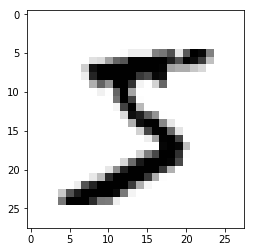

In [29]:
X_train, y_train, X_val, y_val, X_test, y_test = load_dataset()
plt.imshow(X_train[0][0], cmap=cm.binary)
plt.show()

In [30]:
net1 = NeuralNet(
    layers=[('input', layers.InputLayer),
            ('conv2d1', layers.Conv2DLayer),
            ('maxpool1', layers.MaxPool2DLayer),
            ('conv2d2', layers.Conv2DLayer),
            ('maxpool2', layers.MaxPool2DLayer),
            ('dropout1', layers.DropoutLayer),
            ('dense', layers.DenseLayer),
            ('dropout2', layers.DropoutLayer),
            ('output', layers.DenseLayer),
            ],
    # input layer
    input_shape=(None, 1, 28, 28),
    # layer conv2d1
    conv2d1_num_filters=32,
    conv2d1_filter_size=(5, 5),
    conv2d1_nonlinearity=lasagne.nonlinearities.rectify,
    conv2d1_W=lasagne.init.GlorotUniform(),  
    # layer maxpool1
    maxpool1_pool_size=(2, 2),    
    # layer conv2d2
    conv2d2_num_filters=32,
    conv2d2_filter_size=(5, 5),
    conv2d2_nonlinearity=lasagne.nonlinearities.rectify,
    # layer maxpool2
    maxpool2_pool_size=(2, 2),
    # dropout1
    dropout1_p=0.5,    
    # dense
    dense_num_units=256,
    dense_nonlinearity=lasagne.nonlinearities.rectify,    
    # dropout2
    dropout2_p=0.5,    
    # output
    output_nonlinearity=lasagne.nonlinearities.softmax,
    output_num_units=10,
    # optimization method params
    update=nesterov_momentum,
    update_learning_rate=0.01,
    update_momentum=0.9,
    max_epochs=10,
    verbose=1,
    )
# Train the network
nn = net1.fit(X_train, y_train)

c:\users\genesis\miniconda3\lib\site-packages\lasagne\layers\conv.py:489: UserWarning: The `image_shape` keyword argument to `tensor.nnet.conv2d` is deprecated, it has been renamed to `input_shape`.
  
c:\users\genesis\miniconda3\lib\site-packages\lasagne\layers\conv.py:489: UserWarning: The `image_shape` keyword argument to `tensor.nnet.conv2d` is deprecated, it has been renamed to `input_shape`.
  


# Neural Network with 160362 learnable parameters

## Layer information

  #  name      size
---  --------  --------
  0  input     1x28x28
  1  conv2d1   32x24x24
  2  maxpool1  32x12x12
  3  conv2d2   32x8x8
  4  maxpool2  32x4x4
  5  dropout1  32x4x4
  6  dense     256
  7  dropout2  256
  8  output    10

  epoch    trn loss    val loss    trn/val    valid acc  dur
-------  ----------  ----------  ---------  -----------  ------
      1     0.81410     0.16509    4.93129      0.95282  79.85s
      2     0.27009     0.10720    2.51942      0.96932  73.65s
      3     0.19737     0.08363    2.35987      0.97551  76.82s
      4     0.15590     0.07206    2.16355      0.97851  74.24s
      5     0.13638     0.06531    2.08820      0.98001  76.52s
      6     0.12181     0.05961    2.04330      0.98251  86.83s
      7     0.11307     0.05565    2.03170      0.98251  87.43s
      8     0.10081     0.05074    1.98670      0.98471  103.52s
      9     0.09771     0.04881    2.00198      0.9

In [31]:
preds = net1.predict(X_test)


[[ 976    0    0    0    0    0    2    1    1    0]
 [   0 1131    1    1    0    0    1    1    0    0]
 [   2    2 1023    1    0    0    0    3    1    0]
 [   0    0    3 1001    0    2    0    4    0    0]
 [   0    0    0    0  975    0    5    0    0    2]
 [   1    0    0    4    0  883    1    1    0    2]
 [   3    3    0    0    1    2  949    0    0    0]
 [   0    2    8    1    0    0    0 1013    1    3]
 [   2    0    2    2    1    0    0    2  962    3]
 [   3    2    0    1    9    3    1    8    0  982]]


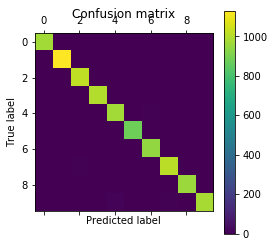

In [34]:
cm = confusion_matrix(y_test, preds)
print(cm)
plt.matshow(cm)

plt.title('Confusion matrix')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()